# 1. Introduction: Tackling Pneumonia with AI
Hi AI newcomers! Welcome to our interactive coding session as part of the AI Bootcamp by [TUM.ai](http://tum.ai/). In the following we will go step-by-step from defining a suitable use case that can be tackled by Machine Learning, getting the right data + understanding it, and finally developing, training and evaluating our first Deep Learning model.

Let's start with understanding the underlying use case we want to tackle!

### 1.1 What is pneumonia?
Pneumonia is an infection of one or both of the lungs caused by bacteria, viruses, or fungi. It is a serious infection in which the air sacs fill with pus and other liquid. Anyone can get pneumonia - however, adults older than 65, children younger than 2, people with certain medical conditions and people that smoke are more at risk.

### 1.2 What causes pneumonia?
There are more than 30 different causes of pneumonia, and they’re grouped by the cause. The main types of pneumonia are:

- **Bacterial pneumonia.** This type is caused by various bacteria. The most common is Streptococcus pneumoniae. It usually occurs when the body is weakened in some way, such as by illness, poor nutrition, old age, or impaired immunity, and the bacteria are able to work their way into the lungs.

- **Viral pneumonia.** This type is caused by various viruses, including the flu (influenza), and is responsible for about one-third of all pneumonia cases.

- **Mycoplasma pneumonia.** This type has somewhat different symptoms and physical signs and is referred to as atypical pneumonia. It is caused by the bacterium Mycoplasma pneumoniae.

### 1.2 How great is its impact on human health?
2.5 million people died from pneumonia in 2019. Almost a third of all victims were children younger than 5 years, it is the leading cause of death for children under 5.

**Sources:** [OurWorldInData](https://ourworldindata.org/pneumonia), [Johns Hopkins Medicine](https://www.hopkinsmedicine.org/health/conditions-and-diseases/pneumonia)

# 2. Setting up our work environment: Import  
Every data science or machine learning project starts with setting up an appropriate working environment, including what types of "tools" and "existing resources" to use. In the following we will briefly present some of the libraries and frameworks that exist and that we'll be using for our project. In general, when starting a project always try look for existing work that you can build on - for most use cases other driven people have already created stuff (code) that you can build on!

### 2.1 Libraries

- **Numpy**: NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, etc. -> More info [here](https://numpy.org/doc/stable/)!

- **Pandas**: The most popular Python library for data analysis. -> More info [here](https://pandas.pydata.org/docs/)!

- **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. -> More info [here](https://matplotlib.org/)!

- Many more (see below)!

### 2.2 Machine Learning Frameworks

- **Tensorflow and Keras**: TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. Key abilities are: Efficient execution of low-level tensor operations on CPU/GPU/TPU, gradient computation of defferentiable expressions and scaling computation to many devices (e.g. GPU clusters). Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. More info [here](https://keras.io/about/)!

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import os
from os import listdir
from os.path import isfile , join
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread

# 3. Inspect Data: What kind of data can we access?
In the media we hear a lot about fancy new model architectures (e.g. [GPT-3 by OpenAI](https://en.wikipedia.org/wiki/GPT-3), or [Alphafold by Deepmind](https://www.deepmind.com/research/highlighted-research/alphafold)) or algorithmic approaches in the Machine Learning / Deep Learning Space. However, another core component in Machine Learning projects, arguably even more important than a fancy algorithm, are **the data** we use to train our models. At this the fameous saying goes **"Garbage In, Garbage Out (GIGO)"**. Getting a good understanding of the kind of data at our disposal will therefore be crucial for building a well performing Machine Learning model.

**Note:** We are using "Machine Learning" and "Deep Learning", as well as "model" and "algorithm" interchangeably here, as this doesn't make a big difference in our use case. Should you be interested in more theory, reach out during class or see the resource section below!

### 3.1 How is pneumonia diagnosed?
The following tests may be used to confirm the diagnosis:

- **Chest X-ray:** This test takes pictures of internal tissues, bones, and organs, including the lungs.

- **Blood tests:** This test may be used to see whether infection is present and if infection has spread to the bloodstream (blood cultures). Arterial blood gas testing checks the amount of oxygen in your bloodstream.

- **Sputum culture:** This test is done on the material that is coughed up from the lungs and into the mouth. It’s often used to see if there’s an infection in the lungs.

### 3.2 Where do our data come from?

In our case we have Chest X-Ray Images to our disposal with following important context:
- **Aggregation / Collection site:** Chest X-Ray scans of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.

- **Workflow:** All chest X-ray imaging was performed as part of patients’ routine clinical care.

- **Quality Assurance:** All images were reviewd and graded by two expert physicians before being cleared for training the AI system (unreadable or low quality scans were manually removed). In order to account for any grading errors, the evaluation set was also checked by a third expert.

![China University Jobs
Guangzhou Women and Children's Medical Center](https://www.chinauniversityjobs.com/wp-content/uploads/2021/09/r%E5%B9%BF%E5%B7%9E%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8C%BB%E7%96%97%E4%B8%AD%E5%BF%83logo-min.png)

### 3.3 How do our data look like?
In the following we will "interact" with the data we have. This means we will look at some key attributes (modality, classes, number, noise, etc.) to try to better understand what kind of data we have and what information (which we want to extract from it via ML) it contains.

### 3.3.1 Plotting key characteristics of our data with Pandas [Implementation Details]

- **Transformation to Pandas Dataframe (DF):** A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column. We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names, and whose values are a list of entries.

- **Plotting the shape of our DF:** We can use the shape attribute to check how large the resulting DataFrame is: In this case we have approx. 2 x 5k = 10k entries for our training data (see plot below)

- **Plotting the head of our DF:** We can examine the contents of the resultant DataFrame using the head() command, which grabs the first five rows.

In [ ]:
np.random.seed(1)

# define path to data directory
data_dir = Path('../input/ai-bootcamp-2-x-ray-pneumonia-classification/chest_xray/chest_xray')

Train_set = data_dir / 'train'
Test_set = data_dir / 'test'

#Train
Train_set_Normal = Train_set / 'NORMAL'
Train_set_Pneumonia =Train_set /'PNEUMONIA'

normal_cases = Train_set_Normal.glob("*.jpeg")
pneumonia_cases = Train_set_Pneumonia.glob("*.jpeg")
test_cases = Test_set.glob("*.jpeg")

#Empty List for training image
train_data = []

#Saving images and labels as a tuple (normal = 0, pneumonia = 1)
for j in normal_cases:
    train_data.append((j,0))
for j in pneumonia_cases:
    train_data.append((j,1))  
    
#Visualizing in dataframe for better readability
df = pd.DataFrame(train_data,columns = ['img','label'],index = None)
df_t = pd.DataFrame(test_cases, columns = ['img'], index = None)

#Plotting training set
print(df.shape)
df = df.sample(frac=1).reset_index(drop = True) #Shuffling the dataset so that both cases could be visualized. 
print(df.head())
print("\n")

#Plotting test set
print(df_t.shape)
print(df_t.head())
print("\n")

Looking at the above output we can deduce the following **key attributes about our data**:
- Our data is structure into 2 folders (train and test set) -> See Chapter 4 for motivation!

- **Modality:** Image data

- Labelled dataset with two classes (1 - Pneumonia, 0 - Normal)

- **Amount:** **5856** .JPEG images, of which **5232 are labelled** (train set) and **624 are unlabelled** (test set)

- **Noise:** We assume that the data is already cleaned and all images are of high quality

### 3.3.2 Visualizing a few samples with Matplotlib and Skimage [Implementation Details]

- **Selecting a few image samples from Pandas DF:** Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.Pandas indexing works in one of two paradigms. The first is **index-based selection:** selecting data based on its numerical position in the data - the keyword for index-based selection is **"iloc"**. The second paradigm for attribute selection is the one followed by the loc operator: **label-based selection**. Using index-based selection with "iloc", it's the data index value, not its position, which matters. In our case (see below), we are selecting the first 5 rows from our image column - both for label = 0, and label = 1.

- **Reading in images with imread function from skimage.io module:** If you’re doing image processing in Python, then of of the first things you’ll need to do is load the image into your programming environment. The imread function is part of the skimage.io namespace and with it we can load .jpg images by their file path by calling the function as skimage.io.imread().

- **Plotting samples in grid structure with Matplotlib:** With mathplotlib's subplot() function you can draw multiple plots in one figure. The subplot() function takes three arguments that describes the layout of the figure. The layout is organized in rows and columns, which are represented by the first and second argument. The third argument represents the index of the current plot.

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (df[df['label']==1]['img'].iloc[:5]).tolist()
normal_samples = (df[df['label']==0]['img'].iloc[:5]).tolist()

# Concatenate the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

Looking at the above few samples two observations can be made:
- **Differentiation between Pneumonia and Normal seems non-trivial** - Do you see a clear difference between pneumonia and non-pneumonia / normal image samples? Obviously a lot of training and experience is necessary to be able to clearly distinguish both cases - a task only a properly trained radiologist can do. However, especially in developing countries Radiologists can be few for a lot of people (e.g. "In 2014, Rwanda had only 11 practicing radiologists for its population of 11 million people." - [source](https://www.devex.com/news/sponsored/q-a-rwanda-s-radiology-problem-gets-a-startup-solution-101507)). This seems to underline the potential of training a Computer Vision algorithm that is capable of helping people make decisions based on Chest X-Ray.

- **Our labels do not differentiate between different kinds of pneumonia** - Additionally, it is important to note here, that we currently only differentiate between pneumonia and normal - typically (and also later in this notebook) referred to as "Binary Classification". To get more precise results one could for instance try to distinguish between different types of pneumonia (bacterial vs. viral). This however would entail having a "Mutliclass Classification Task", for which also the necessary labeling and data would is needed!

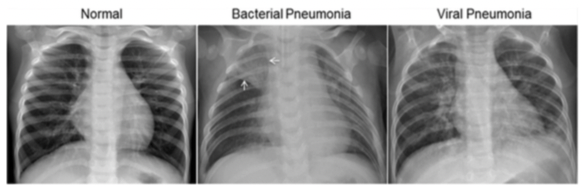

### 3.3.3 Plotting the data distribution over our 2 classes using Matplotlib and Seaborn [Implementation Details]

- **Counting cases for both classes with Pandas DF:** Pandas Index.value_counts() function returns objects containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

- **Plotting annotated bar chart for classcounts with Seaborn:** sns.barplot - This tells the notebook that we want to create a bar chart. Remember that sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix. For more detail, see [here](https://www.kaggle.com/code/alexisbcook/bar-charts-and-heatmaps) or resource section below.

In [ ]:
# Get the counts for each class
cases_count = df['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

Looking at the above bar chart, we can make following observations:

- Our data is **highly imbalanced** over the two classes pneumonia and normal

- We have almost **thrice** the amount of pneumonia cases compared to the normal cases

- This scenario is **common in medical domain**. Can you think of any issues this might cause for training our Machine Learning model? Hint: Think about how you typically evaluate the performance of a Machine Learning model!

# 4. Loading our Data
After having inspected the data at our disposal, we can now think of how to "access" the data in an efficient way, in order to use it for training our algorithms / models. In modern Machine Learning frameworks like Tensorflow (see section 2 for more detail) one typically creates a so-called "Dataloader". In our case the Dataloader defines a way to "load" the X-Ray images - meaning to retrieve them - and prepare them for the training / optimization task in chapter 5.
In the following we'll first look at how we typically partition our data in Machine Learning projects, we'll learn about "augmentation techniques" and how to create a Dataloader class in Tensorflow, based on data generators.

### 4.1 Split data into training, validation and test data
#### Why do you need to split data?
Our primary goal in Machine Learning is to find good predictions for a certain problem domain. However, normally we only have limited data available that represents this problem domain and we need a way to make sure that the predictions we make on the data we trained our model on "generalize" well to "unseen" data from this problem domain (more about this in chapter 6). 

**For now, let's remember:** **Train-Valid-Test split** is a **technique to evaluate the performance of your machine learning model** — classification or regression alike. You take a given dataset and divide it into three subsets. A brief description of the role of each of these datasets is below.

- **Train Dataset [70-80% of original data]**: Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

- **Valid Dataset [10-20% of original data]**: Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.

- **Test Dataset [10% of original data]**: Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset. **IMPORTANT:** This part of the data can only be "used" once and cannot be used to increase model performance! Test data simulates real world "unseen" data.

![Towards Data Science
About Train, Validation and Test Sets in Machine Learning](https://miro.medium.com/max/1400/1*Nv2NNALuokZEcV6hYEHdGA.png)

### 4.2 Augmentation techniques: The Usefulness of Fake Data
The best way to improve the performance of a machine learning model is to train it on more data. The more examples the model has to learn from, the better it will be able to recognize which differences in images matter and which do not. More data helps the model to *generalize* better.

One easy way of getting more data is to use the data you already have. If we can transform the images in our dataset in ways that preserve the class, we can teach our classifier to ignore those kinds of transformations. For instance, whether a car is facing left or right in a photo doesn't change the fact that it is a *Car* and not a *Truck*. So, if we **augment** our training data with flipped images, our classifier will learn that "left or right" is a difference it should ignore.

And that's the whole idea behind data augmentation: add in some extra fake data that looks reasonably like the real data and your classifier will improve.

Typically, many kinds of transformation are used in combination when augmenting a dataset. These might include:
- Rotating the image
- Adjusting the color or contrast
- Warping the image
- etc.


<img src="attachment:7b963f63-9aba-42e5-b3e1-e769a490d1a4.png" alt="drawing" style="width:400px;"/>

### 4.3 Using Data Augmentation with Keras in Tensorflow [Implementation Details]
Data augmentation is usually done online, meaning, as the images are being fed into the network for training. Each time an image is used during training, a new random transformation is applied. This way, the model is always seeing something a little different than what it's seen before.**Keras** lets you augment your data in **two ways**. The first way is to **include it in the data pipeline** with a function like **ImageDataGenerator**. The second way is to include it in the model definition by using Keras's preprocessing layers. We'll be using the first option by defining a data generator as seen below.



<img src="https://d3i71xaburhd42.cloudfront.net/81b087ef324ec09632570b6c07c57b30bcdd3128/3-Table1-1.png" alt="drawing" style="width:600px;"/>

In [ ]:
def to_grayscale_then_rgb(image):
    # convert RGB image to grayscale
    image = tf.image.rgb_to_grayscale(image)
    
    # convert grayscale image to RGB
    image = tf.image.grayscale_to_rgb(image)
    
    return image

# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
datagen_val = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2, #making sure to have a 80-20 split in train-val data
    preprocessing_function=to_grayscale_then_rgb
)

datagen_train = ImageDataGenerator(
    rescale=1/255,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True, #biologically sensible?
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    validation_split=0.2, #making sure to have a 80-20 split in train-val data
    fill_mode='nearest',
    preprocessing_function=to_grayscale_then_rgb
)

class DataLoader:
    def __init__(self, path_to_picture_directory, 
                 batch_size=64, 
                 shuffle_buffer_size=1024, 
                 img_width=500,
                 img_height=500, augment = True):
        
        self.path_to_picture_directory = path_to_picture_directory
        self.img_width = img_width
        self.img_height = img_height
        if augment:
            self.train_generator = datagen_train.flow_from_directory(
                os.path.join(data_dir, 'train'),
                subset='training',
                target_size=(img_height, img_width),
                batch_size=batch_size,
                class_mode='binary',
                seed=42
            )
        else:
            self.train_generator = datagen_val.flow_from_directory(
                os.path.join(data_dir, 'train'),
                subset='training',
                target_size=(img_height, img_width),
                batch_size=batch_size,
                class_mode='binary',
                seed=42
            )
        
        self.validation_generator = datagen_val.flow_from_directory(
            os.path.join(data_dir, 'train'),
            subset='validation',
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='binary',
            seed=42
        )

# 5. Model Definition & Training

#### 5.1 Binary Classification
Classification into one of two classes is a common machine learning problem. You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease. These are all binary classification problems.

In your raw data, the classes might be represented by strings like "Yes" and "No", or "Dog" and "Cat". Before using this data we'll assign a class label: one class will be 0 and the other will be 1. Assigning numeric labels puts the data in a form a neural network can use.

In the image below you can see an example of a 2d classification task. In this example the function to seperate the to classes is very simple and can be estimated with a linear function.

In case of highdimensional data like pictures usually more complex functions are needed to separae classes. One way to estimate such functions are neural networks.


<img src="https://www.researchgate.net/profile/Zakarya-Farou/publication/353288055/figure/fig1/AS:1046167500644352@1626437177029/Example-of-a-binary-classification-for-a-dummy-dataset-with-two-features.ppm" alt="drawing" style="width:600px;"/>

#### 5.2 Component Overview

##### 5.2.1 Loss

The loss function for a machine learning model describes how the error between the predicted values and the actual values is calculated. The goal of a machine learning task is always to minimize this error. Different loss functions are needed to solve different machine learning tasks. Let $L$ denote the loss function, $y$ denote the vector of true labels, and $\hat{y}$ denote the vector of predicted labels.

**Mean Squared Error**

One of the simplest and most common loss functions is the mean-squared-error loss. As the name suggests, it returns the mean of all squared differences between predicted and actual values. 

\begin{align}
    L_{MSE}(y,\hat{y}) &=\frac {1}{l}\sum _{k=1}^{l}(y_{k}-{\hat{y}_{k}})^{2}
\end{align}


**Binary Cross Entropy**

Binary Cross-Entropy $BCE$ is mainly used for binary and multi-label classification, as it can be interpreted as an accumulation of binary classifiers. 
\begin{align}
    L_{BCE}(y,\hat{y}) =-\frac{1}{l}\sum _{k=1}^{l}y_{k}\cdot log({\hat{y}_{k}}) + (1-y_i)\cdot log({1-\hat {y_{k}}})
\end{align}

##### 5.2.2 Optimizer

Now that we know how to calculate a measure of distance between the predicted outcome and the actual target variable we want to know how reduce that distance. Stochastic Gradient Descend (SGD) is an alogrithm to achieve exactly that. Our machine learning model output is essentially a complicated weighted sum of its inputs. To reduce the models error we calculate the behaviour of the model error for small changes in each in every weight $w_{ij}$. We then change the model weight in the direction where the error gets smaller. This direction is called the *gradient*. We do this for every sample in the data and then repeat the process until we reach a minumum in our error. This process is called backpropagation and is further explained in this video: https://www.youtube.com/watch?v=Ilg3gGewQ5U 

While the method of stochastic gradient descends (SGD) is the simplest way of computing new weights $w_{ij}$, the performance may be poor. To improve the convergence rate of SGD state of the art machine learning relies on optimization algorithms to calculate new weights. To improve the navigation around local optima and reduce the amount of oscillation. The concept of *momentum* can be interpreted in a quite literal way: if the gradient points in a similar direction for consecutive iterations, the change to the weights per iteration increases; on the other hand, when *momentum* is lost when changing directions. 

Adaptive Moment Estimation (Adam) is a state-of-the-art optimization algorithm that is commonly used for updating weights in neural networks. Adam utilizes information about past gradients to determine the current learning rate. While *momentum* is often described as a ball rolling down a hill, Adam can be interpreted as a heavy ball with friction. 


<!-- ##### 5.2.3 Model
Cross-Entropy for classification

Accuracy is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: accuracy = number_correct / total. A model that always predicted correctly would have an accuracy score of 1.0. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the cross-entropy function.

Now, recall that the loss function defines the objective of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between probabilities, and this is what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one probability distribution to another.

Graphs of accuracy and cross-entropy.
Cross-entropy penalizes incorrect probability predictions.
The idea is that we want our network to predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it. -->

#### A single neuron

<img src="https://www.researchgate.net/profile/Admir-Jahic/publication/317428704/figure/fig1/AS:503302472966144@1497008068485/A-single-neuron-model.png" alt="drawing" style="width:400px;"/>

#### 5.3 Simple Neural Net with Fully Connected Layers

As a simple apporach we will first try to take our X-Ray images and reorganise the pixels into a single very big vector. We will then feed that vector into a simple neural net such as the one that can be seen below to predict the probability of the patient having pneumonia. In our case we have only a single output neuron (not three) that can take values from 0-1.

<!-- ![Neural Network](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png) -->
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="drawing" style="width:600px;"/>

#### 5.3.1 Model Implementation

In [ ]:
def simple_dense_model(img_input_shape=(64, 64, 3)):
    
    # define Input layer
    inputs = layers.Input(shape=img_input_shape)
    
    # flatten image into vector
    x = layers.Flatten()(inputs)

    # define dense layers
    
    # Create 3 dense layers with activation="relu" (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
    # Pass the ouput from one layer as input to the next layer
    # TODO replace this with the 3 dense layers
    x = x
    x = x
    x = x


    # define output layer
    output = layers.Dense(1, activation='sigmoid', name='output')(x)
    
    # tell TensorFlow which layers to use as input/output
    model = tf.keras.Model(inputs=[inputs], outputs=[output])
    
    # show model summary
    
    print(model.summary())
    plot_model(model, to_file='simple.png')
    plt.show()
    
    return model

#### 5.3.2 Traing the Model

* get the data
* specify loss
* define metrics
* compile model -> initialize model with chosen parameters

In [ ]:
def train_model(model, epochs=1):
    
    # define image dimensions
    img_height = 150
    img_width = 150

    # create data generator object
    data = DataLoader(data_dir, img_height=img_height, img_width=img_width, augment= True)

    # create model
    model_ = model(img_input_shape=(img_height, img_width, 3))

    # define loss function
    # TODO find out which loss function is needed for binary classification
    # The loss functions can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/losses
    loss = None # TODO

    # define optimizer
    # TODO create an Adam optimizer
    # The optimizers can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    optimizer = None # TODO

    # define metrics for 
    metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
               tf.keras.metrics.Recall(name='recall'),
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.FalseNegatives(name='fn'),
               tf.keras.metrics.FalsePositives(name='fp'),
               tf.keras.metrics.TrueNegatives(name='tn'),
               tf.keras.metrics.TruePositives(name='tp')]

    # compile model
    model_.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics)

    # train model
    history = model_.fit(data.train_generator, epochs=epochs, validation_data=data.validation_generator)

    return history, model_

In [ ]:
def plot_loss(history, name):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.savefig(f'loss_plot{name}')
    plt.show()

In [ ]:
history_simple, simple_model = train_model(simple_dense_model)
plot_loss(history_simple, 'simple')

#### 5.4 Simple Convolutional Neural Net

In convolutional neural nets weights are reshaped into matrices that are called filters. These filters are then convolved along the entire input image or matrix. Every time the weighted sum of all pixels within this filter is calculated and passed down to the next layer. Depending on the size of the filter this leads to a reduction in dimensions for every layer. Convolutional neural networks work especially well on image data. 

If you want to learn more about convolutional classifiers visit: https://www.kaggle.com/code/ryanholbrook/the-convolutional-classifier


<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" alt="drawing" style="width:600px;"/>

In [ ]:
def simple_conv_model(img_input_shape=(64, 64, 3)):
    
    # define Input layer
    inputs = layers.Input(shape=img_input_shape)

    # TODO define 3 conv layers (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    # TODO Each conv layer is followed by a max pooling 2d layer (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
    
    # TODO conv layers should have 32, 64, and 64 filters
    # TODO kernel size is (3, 3)
    # TODO use relu activation for all conv layers
    # TODO use a pool size of (2, 2) for max pooling
    
    x = inputs # TODO
    x = x # TODO
    
    x = x # TODO
    x = x # TODO
    
    x = x # TODO
    x = x # TODO
    
    
    pooling = layers.GlobalMaxPooling2D()(x)

    # define output layer
    output = layers.Dense(1, activation='sigmoid', name='output')(pooling)
    
    # tell TensorFlow which layers to use as input/output
    model = tf.keras.Model(inputs=[inputs], outputs=[output])
    
    # show model summary
    print(model.summary())
    
    return model

In [ ]:
history_conv, conv_model = train_model(simple_conv_model)
plot_loss(history_conv, 'conv_model')

#### 5.3 Transfer Learning
Transfer learning refers to using pretrained models for a different machine learning task. In the following we will adapt a big state of the art model that was trained on a big image dataset to our needs. The model we are using for this is called ResNet50. ResNet50 is a deep convolutional neural net that utilizes so called skip connections to better pass down gradients through the model.

<img src="https://miro.medium.com/max/1400/1*WpX_8eCeTsEcCs8vdXtUCw.png" alt="drawing" style="width:400px;"/>


In [ ]:
def resnet_model(img_input_shape=(64, 64, 3)):
    
    # define Input layer
    inputs = layers.Input(shape=img_input_shape)
    
    # load pretrained backbone
    resnet = tf.keras.applications.resnet50.ResNet50(
        include_top=False, weights='imagenet', input_tensor=inputs,
        input_shape=img_input_shape, pooling='avg')
    
    # make backbone layers untrainable -> reduce number of parameters (ResNet50 has 23,587,712 params)
    for i in resnet.layers:
        i.trainable = False
    
    # apply backbone to input
    x = resnet(inputs)

    # define classification head layers
    # TODO define 3 dense layers with relu activation
    # Use 500, 100, and 20 neurons
    
    x = x # TODO
    x = x # TODO
    x = x # TODO

    # define output layer
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
    
    # tell TensorFlow which layers to use as input/output
    model = tf.keras.Model(inputs=[inputs], outputs=[output])
    
    # show model summary
    print(model.summary())
    
    return model

In [ ]:
history_transfer, transfer_learning_model = train_model(resnet_model)
plot_loss(history_transfer, 'transfer_learning_model')

# 6. Evaluate Model

**6.1 Loss curves:**

*Let's look at one of the most common problems of training machine learning models.*

**Underfitting and Overfitting:**

<img src="https://www.researchgate.net/publication/339680577/figure/fig2/AS:865364518924290@1583330387982/llustration-of-the-underfitting-overfitting-issue-on-a-simple-regression-case-Data.png" alt="drawing" style="width:600px;"/>


**Note how the model underfits and overfits according to the degree of the polynomial.**

<!-- <img src="attachment:3040806e-c719-4de0-b7be-b4957140ee4a.png" alt="drawing" style="width:600;"/> -->
<!-- ![image.png](attachment:3040806e-c719-4de0-b7be-b4957140ee4a.png) -->

*The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows us to make predictions in the future on data the model has never seen.*

**Bias vs Variance Trade off:** 

<img src="https://miro.medium.com/max/700/1*BVhTW4c1FPFa41ReTqIBXQ.jpeg" alt="drawing" style="width:600px;"/>

**Bias :** *In simple words, bias is the amount by which a model’s prediction differs from the target value, compared to the training data.*

**Variance :** *In simple words , Variance indicates how much the estimate of the target function will alter if different training data were used.*

<img src="https://miro.medium.com/max/1400/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg" alt="drawing" style="width:600px;"/>

**Bias-Variance tradeoff :** *Low bias and Low Variance is the ideal goal of any ML Model but in practice increasing bias decreases variance, and increasing variance decreases bias. Data scientists have to find the correct balance between the both.*
 

**Methods to prevent Overfitting:**

**Adding more data :**

*Your model is overfitting when it fails to generalize to new data. That means the data it was trained on is not representative of the data it is meeting in production. So, retraining your algorithm on a bigger, richer and more diverse data set should improve its performance.*

**Data augmentation :**

*This is a set of techniques used to artificially increase the size of a dataset by applying transformations to the existing data. For instance, in the case of images, you can flip images horizontally or vertically, crop them or rotate them.* 

**Regularization :**

*This method introduce a “complexity penalty” to your model. If the model wants to avoid incurring that penalty, it needs to focus on the most prominent patterns which have a better chance of generalizing well.* 

**Removing features from data :**

*Sometimes, your model may fail to generalize simply because the data it was trained on was too complex and the model missed the patterns it should have detected. Removing some features and making your data simpler can help reduce overfitting.*


**6.2 Confusion matrix:**

<img src="https://miro.medium.com/max/700/1*fxiTNIgOyvAombPJx5KGeA.png" alt="drawing" style="width:600px;"/>
<!-- ![image.png](https://miro.medium.com/max/1400/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg) -->

*In the confusion, the matrix left diagonal (the one with light grey color) shows a count of correctly classified classes by our model while the right diagonal (the one with dark grey color) shows a count of incorrectly classified classes by our model.*

A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

**6.3 Basic evaluation metrics:**

**Accuracy :**

\begin{align}
    accuracy &= \frac{tp+tn}{tp+fp+tn+fn}
\end{align}

*Accuracy represents the number of correctly classified data instances over the total number of data instances.*

**Precision :**

\begin{align}
    precision &= \frac{tp}{tp+fp}
\end{align}

*Precision is nothing but a positive predictive value. Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero.*

**Recall :**

\begin{align}
    recall &= \frac{tp}{tp+fn}
\end{align}

*Recall is also known as sensitivity or true positive rate.Recall should also ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero.*

**F1 Score :**

\begin{align}
    f_1 &= \frac{tp}{tp+\frac{1}{2}(fp+fn)} = 2\frac{p\cdot r}{p+r}\\[10pt]
%     f_\beta &= \frac{(1+\beta^2)\cdot tp}{(1+\beta^2)\cdot tp + \beta^2\cdot fn+fp}
\end{align}

*F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.*

In [ ]:
data = DataLoader(data_dir, img_height=150, img_width=150, augment= True)
preds = transfer_learning_model.evaluate(data.validation_generator, return_dict=True)

data = [[preds['tp'], preds['fp']],[preds['fn'], preds['tn']]]
plt.clf()
plt.imshow(data, interpolation='nearest')
classNames = ['Negative','Positive']
plt.title('Confusion Matrix Transfer Learning Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()

# 7. Create Submission File

In [ ]:
def predict_from_path(model):
    """
        Calculates Prediction for Chest X_Ray Picture
        file_name: name of test file eg. 0.jpeg
    """
    def predict(file_name):
        # get path to picture
        path = join('../input/ai-bootcamp-2-x-ray-pneumonia-classification/chest_xray/chest_xray/test', file_name) 

        # open picture
        with Image.open(path) as im:

            #  load picture into numpy array
            im = np.asarray(im)

            # resize picture to desired size
            im = cv2.resize(im, (150, 150))

            # convert grayscale image to RGB -> 1 Channel to 3 Channel Image
            im  = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)

            # normalize image to 0-1 scale
            im = im*(1/255)

            # calculate prediction
            prediction = model.predict(np.expand_dims(im, 0))[0][0]>0.5

            return prediction
    return predict
    

In [ ]:
# define test directory
test_dir = os.path.join(data_dir, 'test')

# collect all filenames in test directory
onlyfiles = sorted([f for f in listdir(test_dir) if isfile(join(test_dir, f))])

# create dataframe containing name and pneumonia column
submission_df = pd.DataFrame({'name': onlyfiles, 'pneumonia': 0})

# save model predictions to dataframe
submission_df['pneumonia'] = submission_df['name'].apply(predict_from_path(transfer_learning_model))

# save submission dataframe to csv
submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())

# 8. Disclaimer & Resources
This notebook contains parts of and was a.o. inspired by the following notebooks:
* [Beating everything with Depthwise Convolution ](https://www.kaggle.com/code/aakashnain/beating-everything-with-depthwise-convolution)
* [TensorFlow Pneumonia Classification on X-rays ](https://www.kaggle.com/code/amyjang/tensorflow-pneumonia-classification-on-x-rays)
* [Pneumonia Detection using CNN(92.6% Accuracy)](https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy)

See also following resources:
* [Kaggle courses](https://www.kaggle.com/learn) -> Easy and practical intro to Machine Learning and Deep Learning.
* [GeeksforGeeks](https://www.geeksforgeeks.org/) -> For General python/pandas/DL related questions.
* [w3schools](https://www.w3schools.com/) -> For General python/pandas/DL related questions.
* A lot more!